In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Setting the filepath and loading in a shapefile
file = "./files/countries.shp"
map_df = gpd.read_file(file)

#Loading the datasets & doing some data processing like column re-naming
df = pd.read_csv('./files/index.csv')
lang = pd.read_csv('./files/languages.csv', encoding = 'cp1252')
lang.columns = ['lang_id', 'code', 'language_name', 'perc_of_people_spoken', 'official']
countries = pd.read_csv('./files/countries.csv', encoding = 'cp1252')
countries.columns = ['country_name', 'iso_2', 'code']
df.columns = ['rank', 'code', 'country', 'ethnic_index', 'cultural_index']
regions = pd.read_csv('./files/regions.csv')

In [3]:
#Merging shp and file with the cultural index file to build a map based on the data
#As every language is in a separate row, aggregating the languages, % of people spoken and the language status
merged_index = map_df.set_index('ADM0_A3').join(df.set_index('code')).reset_index()
lang['aggregated'] = lang.iloc[:,2]+' (' + lang.iloc[:,3].astype(str) + '; ' +lang.iloc[:,4] + ')'
pvt = lang[['lang_id','code','aggregated']].pivot_table(index = 'code',columns = 'aggregated')
final_aggreg = pd.DataFrame(pvt.apply(lambda x: x.dropna().reset_index()['aggregated'].tolist(), axis = 1)).reset_index()
final_aggreg.columns = ['code', 'lang']
merged_lang = merged_index.set_index('ADM0_A3').join(final_aggreg.set_index('code')).reset_index()

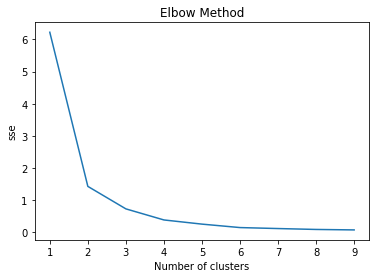

In [5]:
#To identify natural breaks, we will used K-means clustering algorithm. K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. Dropping NAs as the K-means 'doesnt tolerate' missing values.
x = df[['cultural_index']].dropna()
#Although it's recommended to have between 5 and 10 categories, but we will use the elbow method to identify the number of classes
#The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above). The idea is to find the # of clusters where Within Cluster Sum of Squares is min. 
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
#Elbow at k=4 indicating 4 is the best number of clusters.

In [10]:
#Fitting kmeans to the dataset with k=4
km = KMeans(n_clusters = 4, random_state = 0)
y_means = km.fit_predict(x); y_means
#Checking the # of observations in every class
pd.DataFrame(index = x.index, data = y_means).join(x).groupby(0).count()

,cultural_index
0,
0,37
1,36
2,45
3,31
